# ICA Analysis

Code authored by: Shaw Talebi

### imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score

import matplotlib.pyplot as plt

### load data

In [2]:
df = pd.read_csv('data/students_reviews.csv')
df = df.set_index('Id')
df.shape

(83, 15)

In [3]:
df.head()

,job_title,course_join_question,join_reason_pc1,join_reason_pc2,join_reason_pc3,join_reason_pc4,join_reason_pc5,job_category,job_category_IC,job_category_Manager,job_category_Leader,job_category_Entrepreneur,job_category_Student,rating,5_star_review
Id,,,,,,,,,,,,,,,
2,Product Manager,Understand Gen AI usecases,0.836463,0.772963,-0.173617,0.098713,0.425706,Manager,0,1,0,0,0,NaN,False
3,Founder,I would like to get practical experience in bu...,0.702372,-0.305023,0.463640,0.086446,-0.398564,Entrepreneur,0,0,0,1,0,NaN,False
6,Data Analyst/Economist,I would like to start to have a grasp of how I...,1.000000,0.277557,0.252502,0.478106,0.712033,IC,1,0,0,0,0,10.0,True
9,VP Finance,Two things: (1) Build AI applications to strea...,0.502678,-0.213529,0.099288,1.000000,0.511309,Leader,0,0,1,0,0,10.0,True
10,Head of Product,Uplevel my knowledge on AI and ideally be able...,0.829856,0.028958,0.313570,-0.178677,0.623492,Manager,0,1,0,0,0,NaN,False


In [4]:
predictor_list = []
for column_name in df.columns:
    if "pc" in column_name:
        predictor_list.append(column_name)

    if "job_category_" in column_name:
        predictor_list.append(column_name)

In [5]:
# define predictor and target dfs
X = df[predictor_list]
y = df.iloc[:, -1]

### train model

In [6]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [7]:
# train logistic regression model
clf = LogisticRegression(
    random_state=0, 
    class_weight='balanced',
    C=1
).fit(X_train, y_train)

### model performance

In [8]:
# calculate train metrics
train_acc = clf.score(X_train, y_train)
train_pred = clf.predict(X_train)
train_pred_proba = clf.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, train_pred_proba)
train_f1 = f1_score(y_train, train_pred)

# calculate test metrics
test_acc = clf.score(X_test, y_test)
test_pred = clf.predict(X_test)
test_pred_proba = clf.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_pred_proba)
test_f1 = f1_score(y_test, test_pred)

# calculate deltas (train - test)
acc_delta = abs(train_acc - test_acc)
roc_auc_delta = abs(train_auc - test_auc)
f1_delta = abs(train_f1 - test_f1)

# store results
results_data = {
    'Target': y.name,
    'Train_Accuracy': round(train_acc, 3),
    'Test_Accuracy': round(test_acc, 3),
    '|Accuracy_Delta|': round(acc_delta, 3),
    'Train_ROC_AUC': round(train_auc, 3),
    'Test_ROC_AUC': round(test_auc, 3),
    '|ROC_AUC_Delta|': round(roc_auc_delta, 3),
    'Train_F1': round(train_f1, 3),
    'Test_F1': round(test_f1, 3),
    '|F1_Delta|': round(f1_delta, 3)
}

# create results dataframe
results_df = pd.Series(results_data)
results_df

Target              5_star_review
Train_Accuracy              0.649
Test_Accuracy               0.667
|Accuracy_Delta|            0.018
Train_ROC_AUC               0.717
Test_ROC_AUC                0.611
|ROC_AUC_Delta|             0.106
Train_F1                      0.5
Test_F1                     0.571
|F1_Delta|                  0.071
dtype: object

### plot coefficients

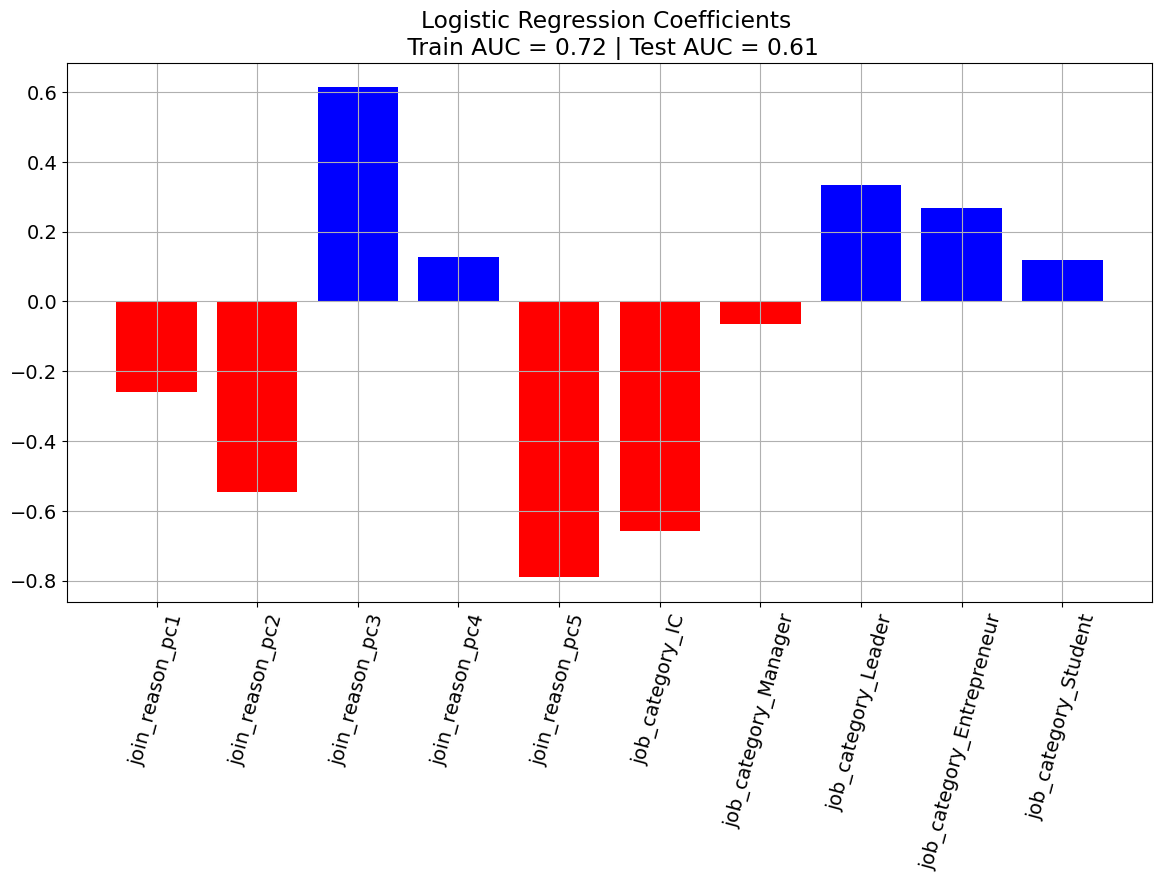

In [9]:
# plot model coefficents
num_vars = len(X.columns)

# Create colors using numpy where
colors = np.where(clf.coef_[0] > 0, 'blue', 'red')

plt.figure(figsize=(14, 7))
plt.rcParams.update({'font.size': 14})

plt.bar(np.linspace(1,num_vars,num_vars), clf.coef_[0], color=colors)
plt.grid()
plt.xticks(np.linspace(1,num_vars,num_vars), X.columns, rotation=75)
plt.title(f"Logistic Regression Coefficients \n Train AUC = {round(train_auc,2)} | Test AUC = {round(test_auc,2)}")
plt.show()

#### Next steps:
- Interpret meaning of PCs
- Explore other targets
- Include more predictors (e.g. source, company size)
- Try to use LLM for job categorization